In [1]:
import importlib.util
import os
import matplotlib.pyplot as plt
import numpy as np

# Add the DLL directory
os.add_dll_directory("C:\\Program Files\\Lumerical\\v231\\api\\python")

# Define the module name and file path
module_name = "lumapi"
# file_path = "C:\\Program Files\\Lumerical\\v232\\api\\python\\lumapi.py"
# file_path = "C:\\Program Files\\Lumerical\\v232\\api\\python\\lumapi.py"
file_path = "C:\\Program Files\\Lumerical\\v231\\api\\python\\lumapi.py"


def load_module_from_file(module_name, file_path):
    spec = importlib.util.spec_from_file_location(module_name, file_path)
    module = importlib.util.module_from_spec(spec)
    spec.loader.exec_module(module)
    return module


# Load the module
lumapi = load_module_from_file(module_name, file_path)

In [2]:
folder_path = r"C:\Users\RamakrishnaVenkitakr\OneDrive - Pixel Photonics GmbH\codes\Scattering-Structures\RCWA\photonic_crystal_sclab_example"

folder_name = r"Ram_pc_slab_rcwa.fsp" #"pc_slab_rcwa.fsp"
# folder_name = r"pc_slab_rcwa.fsp" #"pc_slab_rcwa.fsp"
# folder_name = r"ref_pc_slab_rcwa.fsp" #"pc_slab_rcwa.fsp"

file_path = os.path.join(folder_path,folder_name)

rcwa = lumapi.FDTD(filename=file_path)

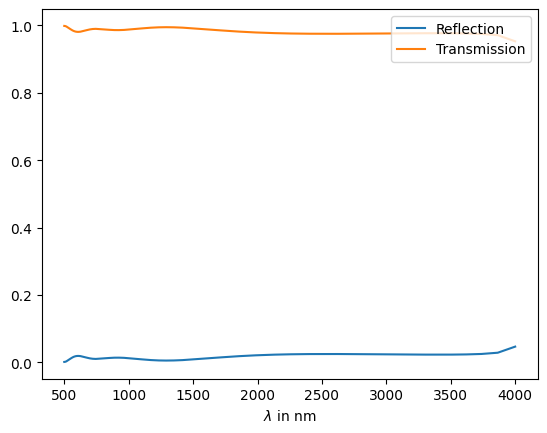

In [18]:
total_energy = rcwa.getresult("RCWA", "total_energy")
lam = total_energy["lambda"]*1e+9 # [nm]
Rp = total_energy["Rp"]
Tp = total_energy["Tp"]
plt.plot(lam, Rp, label="Reflection")
plt.plot(lam, Tp, label="Transmission")
plt.xlabel(r"$\lambda$ in nm")
# plt.xlim([1200,1300])
plt.legend(loc="upper right")
plt.show()

In [45]:
def back_calculate_r(r,ai,af):
    Area_initial_circle = np.pi*r**2
    
    nsi = 3.444
    n_sin = 2

    rfinal = (ai/af)*np.sqrt((Area_initial_circle*(1-nsi) + nsi*ai**2 - n_sin*af**2)/(np.pi*(1-n_sin)))

    return rfinal

In [5]:
def back_calculate_r_ring(r,ai,af,rfinal1):
    Area_initial_circle = np.pi*r**2
    
    nsi = 3.444
    n_sin = 2

    rfinal2 = np.sqrt(((af/ai)**2)*(Area_initial_circle*(1-nsi) + nsi*ai**2 - n_sin*af**2)/(np.pi*(1-n_sin)) + rfinal1**2)

    return rfinal2

In [14]:
rfinal = back_calculate_r_ring(1.5,4,5,0.2)
print(rfinal)

2.46853522512527


In [47]:
rfinal = back_calculate_r(0.2,1,2)
print(rfinal)

0.6220891900389667


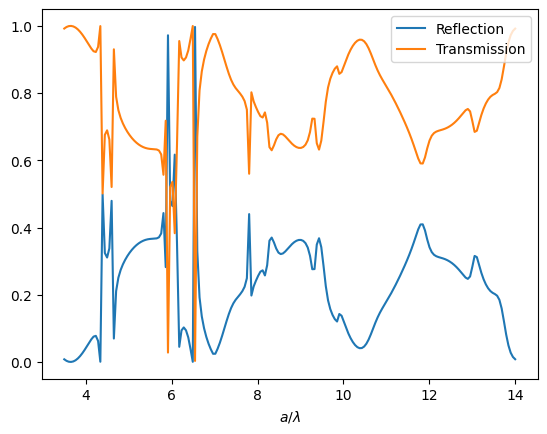

In [17]:
a = 7e-6
total_energy = rcwa.getresult("RCWA", "total_energy")
lam = total_energy["lambda"]
Rp = total_energy["Rp"]
Tp = total_energy["Tp"]
plt.plot(a/lam, Rp, label="Reflection")
plt.plot(a/lam, Tp, label="Transmission")
plt.xlabel(r"$a/ \lambda$")
plt.legend(loc="upper right")
plt.show()

In [22]:
results = {'lam':lam,'Rp':Rp,'Tp':Tp}

path = r"C:\Users\RamakrishnaVenkitakr\OneDrive - Pixel Photonics GmbH\codes\Scattering-Structures\RCWA\photonic_crystal_sclab_example\results_Ram"
a_name = int(a*1e6)
np.save(os.path.join(path,'a_%s_micron' %a_name),results)